# Unused Codes

### Forward Propagation

![](../images/neural-network-sample2.png)

- Neural network is a model with weights for data/value transformation.
- The input data values will be transformed according to the weights of the neural network.
- Given a two-layer network, with two input values $x1$ and $x2$, to get the values of the three outputs in the second layer, $a_1^{(1)}$, $a_2^{(1)}$, $a_3^{(1)}$, we compute the dot product of the *X* and *W*.
    - *X* refers to the input vector/matrix
    - *W* refers to the network weights, which is a 2 x 3 matrix in the current example
    - The weights are represented as the links in-between the first and second layers
    - These weights can be mathematically represesnted as a 2 x 3 Matrix *W*
- Taking the dot product of the input values *X* and the weight matrix *W* is referred to as the **forward propagation** of the network.
- Forward propagation gives us the values of the nodes in the second layer

In [7]:
X = np.array([1,2])
X.shape

(2,)

In [8]:
W = np.array([[1,3,5],[2,4,6]])
W.shape

(2, 3)

In [9]:
Y = np.dot(X,W)
print(Y)

[ 5 11 17]


### Weights, Biases, and Activation Functions

- The output of a node in the network is computed as the sum of the weighted inputs and the bias. Take $a^{(1)}_1 $ for example:

$$ a^{(1)}_1 = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_1$$

- Then the output values go through the activation function and this result would indicate the final output of the node.

$$ z^{(1)}_1= h(a^{(1)}_1) $$

- Not all the nodes need to have an activation function.

In [10]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1,0.2,0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [11]:
A1 = np.dot(X, W1) + B1
print(A1)


Z1 = sigmoid(A1)
print(Z1)

Z2 = softmax(A1)
print(Z2)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
[0.21198272 0.31624106 0.47177622]


## Sequence Models

### Model 3

- One Embedding Layer + LSTM + Dense Layer

In [ ]:
EMBEDDING_DIM = 128
model3 = Sequential()
model3.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len, mask_zero=True))
#model3.add(SpatialDropout1D(0.2))
model3.add(LSTM(64))# , dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(2, activation="softmax"))

model3.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

In [ ]:
plot_model(model3, show_shapes=True)

In [ ]:
history3 = model3.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=50, verbose=2,
                   validation_split = 0.2)

In [ ]:
plot(history3)

### Model 4

- One Embedding Layer + Two Stacked LSTM + Dense Layer

In [ ]:
EMBEDDING_DIM = 128
model4 = Sequential()
model4.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len, mask_zero=True))
#model.add(SpatialDropout1D(0.2))
model4.add(LSTM(64, return_sequences=True)) #, dropout=0.2, recurrent_dropout=0.2))
model4.add(LSTM(64))
model4.add(Dense(2, activation="softmax"))

model4.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)

In [ ]:
plot_model(model4,show_shapes=True)

In [ ]:
history4 = model4.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=50, verbose=2,
                   validation_split = 0.2)

In [ ]:
plot(history4)

### Model 5

- One Embedding Layer + LSTM [hidden state of last time step + cell state of last time step] + Dense Layer

In [ ]:
EMBEDDING_DIM = 128

inputs = keras.Input(shape=(max_len,))
x=layers.Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len, mask_zero=True)(inputs)
#x=layers.SpatialDropout1D(0.2)(x)
x_all_h,x_last_h, x_c = layers.LSTM(64, dropout=0.2, 
                               recurrent_dropout=0.2, 
                               return_sequences=False, return_state=True)(x)
## LSTM Parameters:
#     `return_seqeunces=True`: return the hidden states for each time step
#     `return_state=True`: return the cell state of the last time step
#     When both are set True, the return values of LSTM are:
#     (1) the hidden states of all time steps (when `return_sequences=True`) or the hidden state of the last time step
#     (2) the hidden state of the last time step
#     (3) the cell state of the last time step

x = layers.Concatenate(axis=1)([x_last_h, x_c])
outputs=layers.Dense(2, activation='softmax')(x)
model5 = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

plot_model(model5, show_shapes=True)

In [ ]:
model5.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)
history5 = model5.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=50, verbose=2,
                   validation_split = 0.2)

In [ ]:
plot(history5)

In [ ]:
model5.evaluate(X_test, y_test, batch_size=128, verbose=2)

### Model 6

- Adding AttentionLayer
    - Use the hidden state h of the last time step and the cell state c of the last time step
    - Check their attention
    - And use [attention out + hidden state h of the last time step] for decision

In [ ]:
EMBEDDING_DIM = 128

inputs = keras.Input(shape=(max_len,))
x=layers.Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len)(inputs)
#x=layers.SpatialDropout1D(0.2)(x)
x_all_hs, x_last_h, x_last_c = layers.LSTM(64, dropout=0.2, 
                               recurrent_dropout=0.2, 
                               return_sequences=True, return_state=True)(x)
## LSTM Parameters:
#     `return_seqeunces=True`: return the hidden states for each time step
#     `return_state=True`: return the cell state of the last time step
#     When both are set True, the return values of LSTM are:
#     (1) the hidden state of the last time step
#     (2) the hidden states of all time steps (when `return_sequences=True`) or the hidden state of the last time step
#     (3) the cell state of the last time step


atten_out = layers.Attention()([x_last_h, x_last_c])

x = layers.Concatenate(axis=1)([x_last_h, atten_out])
outputs=layers.Dense(2, activation='softmax')(x)
model6 = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

plot_model(model6, show_shapes=True)

In [ ]:
model6.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)
history6 = model6.fit(X_train, y_train, 
                    batch_size=128, 
                    epochs=50, verbose=2,
                   validation_split = 0.2)

In [ ]:
plot(history6)

# Seq to Seq Models Functions

## Previous Version

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir('/content/drive/My Drive/_MySyncDrive/Repository/python-notes/nlp')

In [ ]:
%pwd

In [ ]:
!pip install tf-nightly

In [ ]:
import tensorflow, keras
print(tensorflow.__version__)
print(keras.__version__)

## Functions

In [ ]:
import re
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Input, LSTM, Dense, GRU
from tensorflow.keras.layers import AdditiveAttention, Attention
import numpy as np
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
from keras import Model
from keras.models import Sequential
from keras.layers import LSTM, GRU, Concatenate
from keras.layers import Attention
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from keras import Input
from attention import AttentionLayer
from keras.utils import to_categorical


# Path to the data txt file on disk.
def get_data(data_path, train_test = 0.9):
    data_path = '../../../RepositoryData/data/deep-learning-2/addition.txt'
    with open(data_path, 'r', encoding='utf-8') as f:
        lines = f.read().split('\n')

    enc_text=[l.split('_')[0] for l in lines]
    dec_text=[l.split('_')[-1].strip() for l in lines]

    dec_text = ['_' + sent + '_' for sent in dec_text]
    
    np.random.seed(123)
    inds = np.arange(len(enc_text))
    np.random.shuffle(inds)
        
    train_size = int(round(len(lines)*train_test))
    train_inds = inds[:train_size]
    test_inds = inds[train_size:]
    tr_enc_text = [enc_text[ti] for ti in train_inds]
    tr_dec_text = [dec_text[ti] for ti in train_inds]

    ts_enc_text = [enc_text[ti] for ti in test_inds]
    ts_dec_text = [dec_text[ti] for ti in test_inds]
    
    return tr_enc_text, tr_dec_text, ts_enc_text, ts_dec_text


## when the max_len is known, use this func to convert text to seq
def sents2sequences(tokenizer, sentences, reverse=False, pad_length=None, padding_type='post'):
    encoded_text = tokenizer.texts_to_sequences(sentences)
    preproc_text = pad_sequences(encoded_text, padding=padding_type, maxlen=pad_length)
    if reverse:
        preproc_text = np.flip(preproc_text, axis=1)
    return preproc_text



def preprocess_data(enc_tokenizer, dec_tokenizer, enc_text, dec_text):
    enc_seq = enc_tokenizer.texts_to_sequences(tr_enc_text)
    enc_timesteps = np.max([len(l) for l in enc_seq])
    enc_seq = pad_sequences(enc_seq, padding='post', maxlen = enc_timesteps)
    dec_seq = dec_tokenizer.texts_to_sequences(tr_dec_text)
    dec_timesteps = np.max([len(l) for l in dec_seq])
    dec_seq = pad_sequences(dec_seq, padding='post', maxlen = dec_timesteps)
    return enc_seq, dec_seq

In [ ]:
def define_nmt(hidden_size, batch_size, enc_timesteps, enc_vsize, dec_timesteps, dec_vsize):
    """ Defining a NMT model """

    # Define an input sequence and process it.
    if batch_size:
        encoder_inputs = Input(batch_shape=(batch_size, enc_timesteps, enc_vsize), name='encoder_inputs')
        decoder_inputs = Input(batch_shape=(batch_size, dec_timesteps - 1, dec_vsize), name='decoder_inputs')
    else:
        encoder_inputs = Input(shape=(enc_timesteps, enc_vsize), name='encoder_inputs')
        if fr_timesteps:
            decoder_inputs = Input(shape=(dec_timesteps - 1, dec_vsize), name='decoder_inputs')
        else:
            decoder_inputs = Input(shape=(None, dec_vsize), name='decoder_inputs')

    # Encoder GRU
    encoder_gru = GRU(hidden_size, return_sequences=True, return_state=True, name='encoder_gru')
    encoder_out, encoder_state = encoder_gru(encoder_inputs)

    # Set up the decoder GRU, using `encoder_states` as initial state.
    decoder_gru = GRU(hidden_size, return_sequences=True, return_state=True, name='decoder_gru')
    decoder_out, decoder_state = decoder_gru(decoder_inputs, initial_state=encoder_state)

    # Attention layer
    # attn_layer = AttentionLayer(name='attention_layer')
    attn_layer = AdditiveAttention(name="attention_layer")

    ## The input for AdditiveAttention: query, key
    ## It returns a tensor of shape as query
    ## This is different from the AttentionLayer developed by Thushan
    # attn_out, attn_states = attn_layer([encoder_out, decoder_out])

    attn_out, attn_states  = attn_layer([decoder_out,encoder_out],return_attention_scores=True)

    # Concat attention input and decoder GRU output
    decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_out, attn_out])

    # Dense layer
    dense = Dense(dec_vsize, activation='softmax', name='softmax_layer')
    dense_time = TimeDistributed(dense, name='time_distributed_layer')
    decoder_pred = dense_time(decoder_concat_input)

    # Full model
    full_model = Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_pred)
    full_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    full_model.summary()

    """ Inference model """
    batch_size = 1

    """ Encoder (Inference) model """
    encoder_inf_inputs = Input(batch_shape=(batch_size, enc_timesteps, enc_vsize), name='encoder_inf_inputs')
    encoder_inf_out, encoder_inf_state = encoder_gru(encoder_inf_inputs)
    encoder_model = Model(inputs=encoder_inf_inputs, outputs=[encoder_inf_out, encoder_inf_state])

    """ Decoder (Inference) model """
    decoder_inf_inputs = Input(batch_shape=(batch_size, 1, dec_vsize), name='decoder_word_inputs')
    encoder_inf_states = Input(batch_shape=(batch_size, enc_timesteps, hidden_size), name='encoder_inf_states')
    decoder_init_state = Input(batch_shape=(batch_size, hidden_size), name='decoder_init')

    decoder_inf_out, decoder_inf_state = decoder_gru(decoder_inf_inputs, initial_state=decoder_init_state)
    # attn_inf_out, attn_inf_states = attn_layer([encoder_inf_states, decoder_inf_out])
    attn_inf_out, attn_inf_states  = attn_layer([decoder_inf_out, encoder_inf_states],return_attention_scores=True)

    decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_inf_out, attn_inf_out])
    decoder_inf_pred = TimeDistributed(dense)(decoder_inf_concat)
    decoder_model = Model(inputs=[encoder_inf_states, decoder_init_state, decoder_inf_inputs],
                          outputs=[decoder_inf_pred, attn_inf_states, decoder_inf_state])

    return full_model, encoder_model, decoder_model

def train(full_model, enc_seq, dec_seq, batch_size, n_epochs=10):
    """ Training the model """
    loss_epoch = []
    accuracy_epoch = []
    for ep in range(n_epochs):
        losses = []
        accuracies = []
        for bi in range(0, enc_seq.shape[0] - batch_size, batch_size):

            enc_onehot_seq = to_categorical(
                enc_seq[bi:bi + batch_size, :], num_classes=enc_vsize)
            dec_onehot_seq = to_categorical(
                dec_seq[bi:bi + batch_size, :], num_classes=dec_vsize)

            full_model.train_on_batch(
                [enc_onehot_seq, dec_onehot_seq[:, :-1, :]], dec_onehot_seq[:, 1:, :])

            l,a = full_model.evaluate([enc_onehot_seq, dec_onehot_seq[:, :-1, :]], dec_onehot_seq[:, 1:, :],
                                    batch_size=batch_size, verbose=0)

            losses.append(l)
            accuracies.append(a)
        if (ep + 1) % 1 == 0:
            print("Loss/Accuracy in epoch {}: {}/{}".format(ep + 1, np.mean(losses), np.mean(accuracies)))
            loss_epoch.append(np.mean(losses))
            accuracy_epoch.append(np.mean(accuracies))
    return loss_epoch, accuracy_epoch


def infer_nmt(encoder_model, decoder_model, test_enc_seq, enc_vsize, dec_vsize, dec_timesteps):
    """
    Infer logic
    :param encoder_model: keras.Model
    :param decoder_model: keras.Model
    :param test_en_seq: sequence of word ids
    :param en_vsize: int
    :param fr_vsize: int
    :return:
    """

    test_dec_seq = sents2sequences(dec_tokenizer, ['_'], dec_vsize)
    test_enc_onehot_seq = to_categorical(test_enc_seq, num_classes=enc_vsize)
    test_dec_onehot_seq = np.expand_dims(
        to_categorical(test_dec_seq, num_classes=dec_vsize), 1)

    enc_outs, enc_last_state = encoder_model.predict(test_enc_onehot_seq)
    dec_state = enc_last_state
    attention_weights = []
    dec_text = ''
    for i in range(dec_timesteps):

        dec_out, attention, dec_state = decoder_model.predict(
            [enc_outs, dec_state, test_dec_onehot_seq])
        dec_ind = np.argmax(dec_out, axis=-1)[0, 0]

        if dec_ind == 0:
            break
        test_dec_seq = sents2sequences(
            dec_tokenizer, [dec_index2word[dec_ind]], dec_vsize)
        test_dec_onehot_seq = np.expand_dims(
            to_categorical(test_dec_seq, num_classes=dec_vsize), 1)

        attention_weights.append((dec_ind, attention))
        dec_text += dec_index2word[dec_ind]

    return dec_text, attention_weights


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=["PingFang HK"]
def plot_attention_weights(encoder_inputs, attention_weights, enc_id2word, dec_id2word, filename=None):
    """
    Plots attention weights
    :param encoder_inputs: Sequence of word ids (list/numpy.ndarray)
    :param attention_weights: Sequence of (<word_id_at_decode_step_t>:<attention_weights_at_decode_step_t>)
    :param en_id2word: dict
    :param fr_id2word: dict
    :return:
    """

    if len(attention_weights) == 0:
        print('Your attention weights was empty. No attention map saved to the disk. ' +
              '\nPlease check if the decoder produced  a proper translation')
        return

    mats = []
    dec_inputs = []
    for dec_ind, attn in attention_weights:
        mats.append(attn.reshape(-1))
        dec_inputs.append(dec_ind)
    attention_mat = np.transpose(np.array(mats))

    fig, ax = plt.subplots(figsize=(32, 32))
    ax.imshow(attention_mat)

    ax.set_xticks(np.arange(attention_mat.shape[1]))
    ax.set_yticks(np.arange(attention_mat.shape[0]))

    ax.set_xticklabels([dec_id2word[inp] if inp != 0 else "<Res>" for inp in dec_inputs])
    ax.set_yticklabels([enc_id2word[inp] if inp != 0 else "<Res>" for inp in encoder_inputs.ravel()])

    ax.tick_params(labelsize=32)
    ax.tick_params(axis='x', labelrotation=90)

#     if not os.path.exists(config.RESULTS_DIR):
#         os.mkdir(config.RESULTS_DIR)
#     if filename is None:
#         plt.savefig( 'attention.png'))
#     else:
#         plt.savefig(os.path.join(config.RESULTS_DIR, '{}'.format(filename)))

## Main Program

### Data Wrangling and Training

In [ ]:
#### hyperparameters
batch_size = 128
hidden_size = 256
n_epochs = 50

### Get data
tr_enc_text, tr_dec_text, ts_enc_text, ts_dec_text = get_data(data_path='../../../RepositoryData/data/deep-learning-2/addition.txt')

# """ Defining tokenizers """
enc_tokenizer = keras.preprocessing.text.Tokenizer(oov_token='UNK', char_level=True)
enc_tokenizer.fit_on_texts(tr_enc_text)

dec_tokenizer = keras.preprocessing.text.Tokenizer(oov_token='UNK', char_level=True)
dec_tokenizer.fit_on_texts(tr_dec_text)

# ### Getting sequence integer data
enc_seq, dec_seq = preprocess_data(enc_tokenizer, dec_tokenizer, tr_enc_text, tr_dec_text)

# ### timestesps
enc_timesteps = enc_seq.shape[1]
dec_timesteps = dec_seq.shape[1]

# ### vocab size
enc_vsize = max(enc_tokenizer.index_word.keys()) + 1
dec_vsize = max(dec_tokenizer.index_word.keys()) + 1






In [ ]:
print(enc_vsize)
print(dec_vsize)
print(tr_enc_text[:5])
print(tr_dec_text[:5])

In [ ]:
###""" Defining the full model """
full_model, infer_enc_model, infer_dec_model = define_nmt(
    hidden_size=hidden_size,
    batch_size=batch_size,
    enc_timesteps=enc_timesteps,
    dec_timesteps=dec_timesteps,
    enc_vsize=enc_vsize,
    dec_vsize=dec_vsize)

In [ ]:
from keras.utils import plot_model
plot_model(full_model, show_shapes=True)

In [ ]:
%%time
loss, accuracy = train(full_model, enc_seq, dec_seq, batch_size, n_epochs)

In [ ]:
plt.style.use('fivethirtyeight')

plt.plot(range(len(loss)), loss, label='loss')
plt.plot(range(len(accuracy)), accuracy, label='accuracy')
plt.legend()
plt.tight_layout()
plt.show()

### Model Saving

In [ ]:
# full_model.save('../../../RepositoryData/output/seq2seq-attention-addition/full-model.h5')
# infer_enc_model.save('../../../RepositoryData/output/seq2seq-attention-addition/infer-enc-model.h5')
# infer_dec_model.save('../../../RepositoryData/output/seq2seq-attention-addition/infer-dec-model.h5')

### Prediction

In [ ]:
full_model.load_weights('../../../RepositoryData/output/seq2seq-attention-addition/full-model.h5')
infer_enc_model.load_weights('../../../RepositoryData/output/seq2seq-attention-addition/infer-enc-model.h5')
infer_dec_model.load_weights('../../../RepositoryData/output/seq2seq-attention-addition/infer-dec-model.h5')

In [ ]:
plot_model(infer_enc_model,show_shapes=True)

In [ ]:
plot_model(infer_dec_model, show_shapes=True)

In [ ]:
""" Index2word """
enc_index2word = dict(
    zip(enc_tokenizer.word_index.values(), enc_tokenizer.word_index.keys()))
dec_index2word = dict(
    zip(dec_tokenizer.word_index.values(), dec_tokenizer.word_index.keys()))


In [ ]:
def translate(infer_enc_model, infer_dec_model, test_enc_text, 
              enc_vsize, dec_vsize, enc_timesteps, dec_timesteps,
              enc_tokenizer, dec_tokenizer):
    """ Inferring with trained model """
    test_enc = test_enc_text
    print('Translating: {}'.format(test_enc))

    test_enc_seq = sents2sequences(
        enc_tokenizer, [test_enc], pad_length=enc_timesteps)

    test_dec, attn_weights = infer_nmt(
        encoder_model=infer_enc_model, decoder_model=infer_dec_model,
        test_enc_seq=test_enc_seq, enc_vsize=enc_vsize, dec_vsize=dec_vsize, dec_timesteps = dec_timesteps)
    print('\tFrench: {}'.format(test_dec))
    return test_enc_seq, test_dec, attn_weights

In [ ]:
test_enc_seq, test_dec, attn_weights=translate(infer_enc_model=infer_enc_model,
          infer_dec_model=infer_dec_model,
          test_enc_text=ts_enc_text[120],
          enc_vsize=enc_vsize,
          dec_vsize=dec_vsize,
          enc_timesteps=enc_timesteps,
          dec_timesteps=dec_timesteps,
          enc_tokenizer=enc_tokenizer,
          dec_tokenizer=dec_tokenizer)



In [ ]:
""" Attention plotting """
plot_attention_weights(test_enc_seq, attn_weights,
                       enc_index2word, dec_index2word)

In [ ]:

print(tr_enc_text[:5])
print(tr_dec_text[:5])



## Evaluation on Test Data

In [ ]:
def test(full_model, ts_enc_text, ts_dec_text, enc_tokenizer, dec_tokenizer, batch_size):
    # ### Getting sequence integer data
    ts_enc_seq, ts_dec_seq = preprocess_data(enc_tokenizer, dec_tokenizer, ts_enc_text, ts_dec_text)
    losses = []
    accuracies = []
    for bi in range(0, ts_enc_seq.shape[0] - batch_size, batch_size):
        enc_onehot_seq = to_categorical(
            ts_enc_seq[bi:bi + batch_size, :], num_classes=enc_vsize)
        dec_onehot_seq = to_categorical(
            ts_dec_seq[bi:bi + batch_size, :], num_classes=dec_vsize)

        # full_model.train_on_batch(
        #     [enc_onehot_seq, dec_onehot_seq[:, :-1, :]], dec_onehot_seq[:, 1:, :])
        l,a = full_model.evaluate([enc_onehot_seq, dec_onehot_seq[:, :-1, :]], dec_onehot_seq[:, 1:, :],
                                batch_size=batch_size, verbose=0)
        losses.append(l)
        accuracies.append(a)
    print('Average Loss:{}'.format(np.mean(losses)))
    print('Average Accuracy:{}'.format(np.mean(accuracies)))

test(full_model, ts_enc_text = ts_enc_text, ts_dec_text = ts_dec_text, 
     enc_tokenizer = enc_tokenizer, dec_tokenizer = dec_tokenizer, batch_size = batch_size)

### Model 7

- All of the previous RNN-based models only utilize the output of the last time step from the RNN as the input of the subsequent layers.
- We can also make all the hidden outputs at all time steps from the RNN available to the subsequent layers.
- This is the idea of **Attention**.
- Here we add one `AttentionLayer`, which gives us a weighted version of all the hidden states from the RNN. These outputs from AttentionLayer indicate how relevant each hidden state is to computation of the subsequent layer.
    - Use the hidden state h of the last time step and the cell state c of the last time step
    - Check their attention
    - And use [attention out + hidden state h of the last time step] for decision

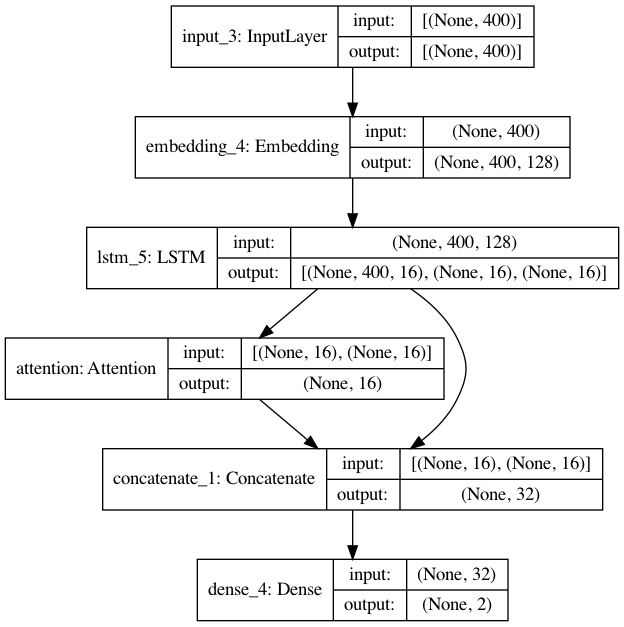

In [65]:
EMBEDDING_DIM = 128

inputs = keras.Input(shape=(max_len,))
x=layers.Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len)(inputs)
#x=layers.SpatialDropout1D(0.2)(x)
x_all_hs, x_last_h, x_last_c = layers.LSTM(16, dropout=0.2, 
                               recurrent_dropout=0.5, 
                               return_sequences=True, return_state=True)(x)
## LSTM Parameters:
#     `return_seqeunces=True`: return the hidden states for each time step
#     `return_state=True`: return the cell state of the last time step
#     When both are set True, the return values of LSTM are:
#     (1) the hidden states of all time steps (when `return_sequences=True`) or the hidden state of the last time step
#     (2) the hidden state of the last time step
#     (3) the cell state of the last time step



atten_out = layers.Attention()([x_last_h, x_last_c])

x = layers.Concatenate(axis=1)([x_last_h, atten_out])
outputs=layers.Dense(2, activation='softmax')(x)
model7 = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

plot_model(model7, show_shapes=True)

In [66]:
model7.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"]
)
history7 = model7.fit(X_train, y_train, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS, verbose=2,
                   validation_split = VALIDATION_SPLIT)

Epoch 1/25
12/12 - 7s - loss: 0.6929 - accuracy: 0.5014 - val_loss: 0.6910 - val_accuracy: 0.5333
Epoch 2/25
12/12 - 4s - loss: 0.6765 - accuracy: 0.7354 - val_loss: 0.6849 - val_accuracy: 0.6028
Epoch 3/25
12/12 - 4s - loss: 0.6472 - accuracy: 0.8146 - val_loss: 0.6715 - val_accuracy: 0.6083
Epoch 4/25
12/12 - 4s - loss: 0.5726 - accuracy: 0.8674 - val_loss: 0.6309 - val_accuracy: 0.6583
Epoch 5/25
12/12 - 4s - loss: 0.4044 - accuracy: 0.8931 - val_loss: 0.5842 - val_accuracy: 0.7278
Epoch 6/25
12/12 - 4s - loss: 0.2294 - accuracy: 0.9201 - val_loss: 0.5840 - val_accuracy: 0.7111
Epoch 7/25
12/12 - 4s - loss: 0.1235 - accuracy: 0.9715 - val_loss: 0.6370 - val_accuracy: 0.7333
Epoch 8/25
12/12 - 4s - loss: 0.0688 - accuracy: 0.9812 - val_loss: 1.0467 - val_accuracy: 0.6750
Epoch 9/25
12/12 - 4s - loss: 0.0735 - accuracy: 0.9771 - val_loss: 0.6922 - val_accuracy: 0.7333
Epoch 10/25
12/12 - 4s - loss: 0.0415 - accuracy: 0.9889 - val_loss: 0.8119 - val_accuracy: 0.7250
Epoch 11/25
12/12 -

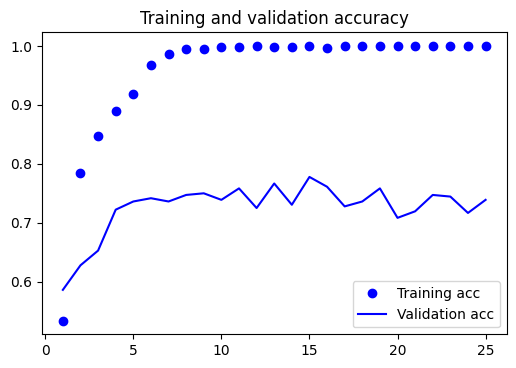

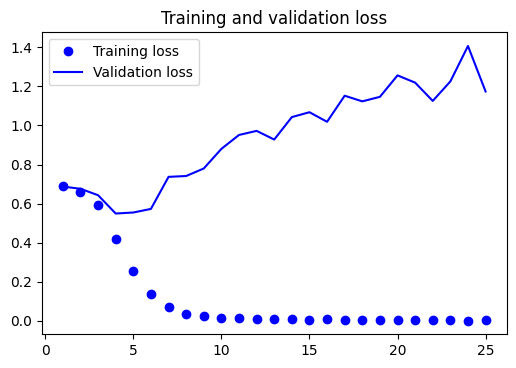

In [67]:
plot(history6)